Observe our dataset

In [3]:
import pandas as pd

dataframe = pd.read_csv('BLE_LTER_sea_ice_measurements.csv', parse_dates=["date_time"]) #transforming date_time colum into a Datetime

In [75]:
#get only the columns we want
df = pd.DataFrame(dataframe, columns=['lagoon','station_name','date_time','hole1_ice_thickness_m','hole2_ice_thickness_m',
                                'hole3_ice_thickness_m', 'spot1_snow_depth_m', 'spot2_snow_depth_m', 'spot3_snow_depth_m',
                                'spot4_snow_depth_m','spot5_snow_depth_m', 'spot6_snow_depth_m', 'spot7_snow_depth_m','spot8_snow_depth_m',
                                'spot9_snow_depth_m','spot10_snow_depth_m', 'freeboard_m', 'latitude', 'longitude', 'station'])

df.head()

,lagoon,station_name,date_time,hole1_ice_thickness_m,hole2_ice_thickness_m,hole3_ice_thickness_m,spot1_snow_depth_m,spot2_snow_depth_m,spot3_snow_depth_m,spot4_snow_depth_m,spot5_snow_depth_m,spot6_snow_depth_m,spot7_snow_depth_m,spot8_snow_depth_m,spot9_snow_depth_m,spot10_snow_depth_m,freeboard_m,latitude,longitude,station
0,Simpson,Simpson Lagoon Deep Station 1,2019-04-21 12:21:00-08:00,1.32,NaN,NaN,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,70.537067,-149.775350,SILD1
1,Simpson,Simpson Lagoon Deep Station 1,2021-04-23 12:20:00-08:00,1.71,NaN,NaN,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,70.537067,-149.775350,SILD1
2,Simpson,Simpson Lagoon Deep Station 1,2022-04-18 12:16:00-08:00,1.53,NaN,NaN,0.09,0.15,0.07,0.08,0.08,0.05,0.12,0.16,0.12,0.11,0.11,70.537067,-149.775350,SILD1
3,Simpson,Simpson Lagoon Deep Station 1,2023-04-20 11:12:00-08:00,1.40,1.2,NaN,0.04,0.09,0.08,0.37,0.41,0.16,0.26,0.17,0.25,0.13,0.08,70.537067,-149.775350,SILD1
4,Simpson,Simpson Lagoon Deep Station 2,2023-04-23 12:51:00-08:00,1.30,NaN,NaN,0.10,0.10,0.11,0.11,0.15,0.06,0.14,0.08,0.17,0.15,0.05,70.539883,-149.476583,SILD2


Display the locations of the different lagoons on a map

In [5]:
# I want to display the locations of the different measuring stations on a map
# I pivoted my dataframe to group by station name and get only latitude/longitude
# I used reset_index because this gives me a multi-index df. this way it is easier to acces my values
geo_df = pd.pivot_table(df, values=['latitude','longitude'], index=['station_name']).reset_index()

#get the name of the station, lat and long into a dictionary
data = { 'Station': geo_df.iloc[::]['station_name'], #this is how I can access my colum in a multi-index df
        'Latitude': geo_df.iloc[::]['latitude'],
        'Longitude': geo_df.iloc[::]['longitude']    
        }
#transform it into a dataframe again
geo_df2 = pd.DataFrame(data)


In [6]:
import folium
import io
from PIL import Image

# Create a Folium map centered at the mean of the coordinates
map_center = [geo_df2['Latitude'].mean(), geo_df2['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=4)

# Add markers for each location
for index, row in geo_df2.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Station']).add_to(mymap)

#save map to png, instead of displaying it only when online
img_data = mymap._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('measuring_stations_lagoons.png')


# Display the map
mymap

Explore ice thickness measurements

In [7]:
#pivot my df to aggregate by lagoon and date_time regarding ice thickness only
df1 = pd.pivot_table(df, values=['hole1_ice_thickness_m', 'hole2_ice_thickness_m', 'hole3_ice_thickness_m'],
                     index=['lagoon','station_name', 'date_time'])
df1.head()

hole1_ice_thickness_m  \
lagoon     station_name                        date_time                                          
Elson East Elson East Lagoon Deep Station 1    2019-04-16 12:25:00-08:00                   1.30   
                                               2021-04-27 11:15:00-08:00                   1.35   
                                               2022-04-13 14:05:00-08:00                   1.32   
                                               2023-04-20 16:30:00-08:00                   1.15   
Elson West Elson West Lagoon Craig E Tweedie 0 2022-04-18 12:00:00-08:00                   1.61   

                                                                          hole2_ice_thickness_m  \
lagoon     station_name                        date_time                                          
Elson East Elson East Lagoon Deep Station 1    2019-04-16 12:25:00-08:00                    NaN   
                                               2021-04-27 11:15:00-08:00                    NaN   
                                               2022-04-13 14:05:00-08:00                    NaN   
                                               2023-04-20 16:30:00-08:00                    1.3   
Elson West Elson West Lagoon Craig E Tweedie 0 2022-04-18 12:00:00-08:00                    NaN   

                                                                          hole3_ice_thickness_m  
lagoon     station_name                        date_time                                         
Elson East Elson East Lagoon Deep Station 1    2019-04-16 12:25:00-08:00                    NaN  
                                               2021-04-27 11:15:00-08:00                    NaN  
                                               2022-04-13 14:05:00-08:00                    NaN  
                                               2023-04-20 16:30:00-08:00                   1.32  
Elson West Elson West Lagoon Craig E Tweedie 0 2022-04-18 12:00:00-08:00                    NaN

In [8]:
# Calculate the mean of different ice holes
# “index” (axis=0, default), “columns” (axis=1) (int this case I wanted the mean across the different rows so I passed 1)
# by default, it is excluding missing (NaN) data
ice_df = df1.agg(['mean'], axis=1)
ice_df.head()

mean
lagoon     station_name                        date_time                          
Elson East Elson East Lagoon Deep Station 1    2019-04-16 12:25:00-08:00  1.300000
                                               2021-04-27 11:15:00-08:00  1.350000
                                               2022-04-13 14:05:00-08:00  1.320000
                                               2023-04-20 16:30:00-08:00  1.256667
Elson West Elson West Lagoon Craig E Tweedie 0 2022-04-18 12:00:00-08:00  1.610000

In [9]:
#which is the highest and lowest ice depth measurment?
#check to which indice the max and min values belong to

max_ice_thickness = ice_df.max()

min_ice_thickness = ice_df.min()

Up until April 2023:
The maximum ice thickness measurement was 1.88 meters, taken at Stefansson lagoon deep station 2, in April 2023
The minimum ice thickness measurement was 1.15 meters, taken at Elson West lagoon deep station 1, in April 2023

In [10]:
# could not reset index before, as it would not allow me to calculate the mean of the columns
ice_df_reset = ice_df.reset_index()
ice_df_reset.head()

,lagoon,station_name,date_time,mean
0,Elson East,Elson East Lagoon Deep Station 1,2019-04-16 12:25:00-08:00,1.300000
1,Elson East,Elson East Lagoon Deep Station 1,2021-04-27 11:15:00-08:00,1.350000
2,Elson East,Elson East Lagoon Deep Station 1,2022-04-13 14:05:00-08:00,1.320000
3,Elson East,Elson East Lagoon Deep Station 1,2023-04-20 16:30:00-08:00,1.256667
4,Elson West,Elson West Lagoon Craig E Tweedie 0,2022-04-18 12:00:00-08:00,1.610000


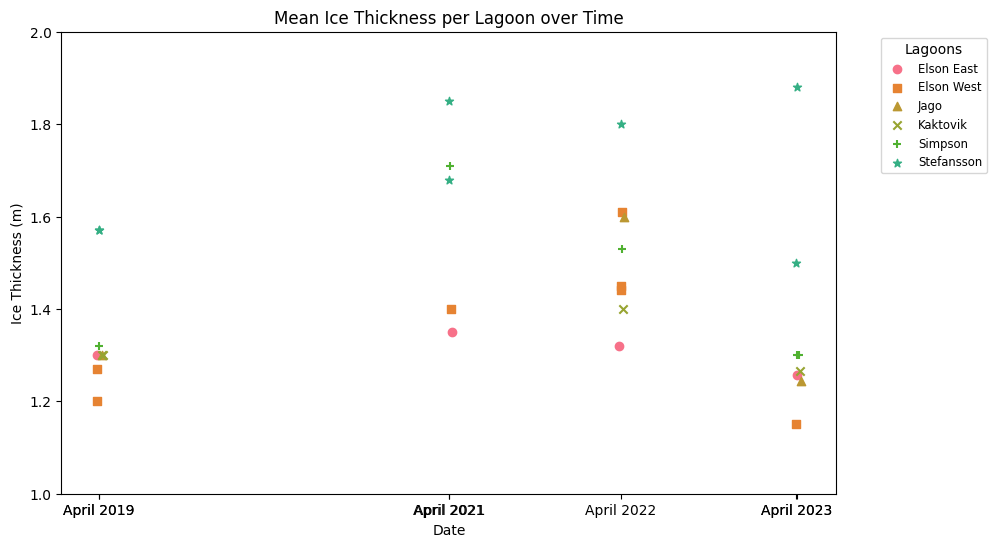

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette
custom_palette = sns.color_palette("husl", 12)  # Example palette with 12 colors

# Set the custom color palette
sns.set_palette(custom_palette)

# Set the size of the plot
plt.figure(figsize=(10,6))

# Assigning 5 different marker shapes
markers = ['o', 's', '^', 'x', '+', '*']

# Plot data with different markers in a single line, using different shapes for each label
for i, lagoon in enumerate(ice_df_reset['lagoon'].unique()):
    lagoon_df = ice_df_reset[ice_df_reset['lagoon'] == lagoon]
    plt.scatter(lagoon_df['date_time'], lagoon_df['mean'], marker=markers[i], label=lagoon)


plt.xlabel('Date')
plt.ylabel('Ice Thickness (m)')

# Set the size of the y-axis
plt.ylim(1, 2)

#set the labels on xticks, some of these dates appeared more than once and became overalayed
plt.xticks(lagoon_df['date_time'],['April 2019','April 2021', 'April 2022', 'April 2023', 'April 2019', 'April 2021', 'April 2023'])

plt.title('Mean Ice Thickness per Lagoon over Time')

plt.legend(title="Lagoons", loc="upper left", fontsize="small", bbox_to_anchor=(1.05, 1))

plt.savefig('Mean Ice Thickness per lagoon.jpg', bbox_inches='tight')

plt.show()

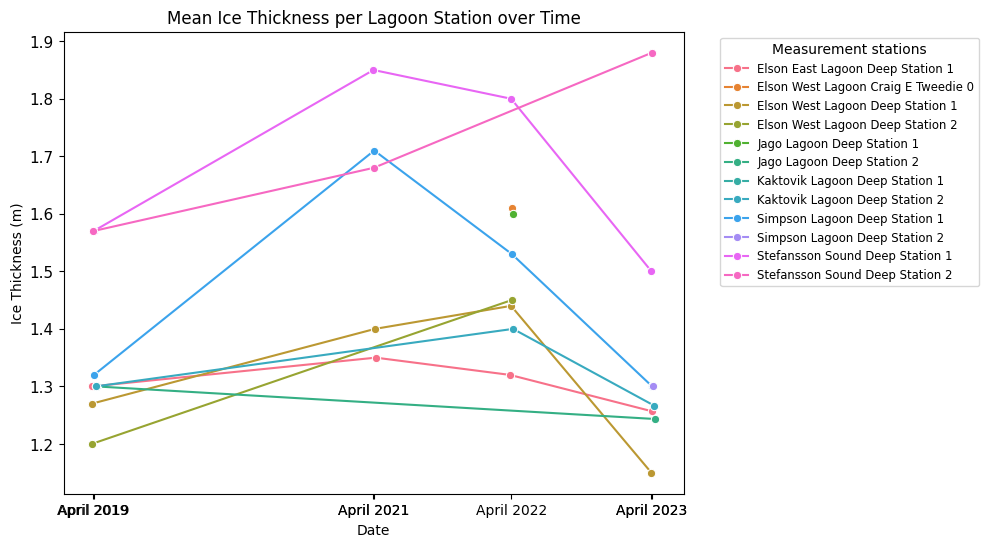

In [12]:
# Set the size of the plot
plt.figure(figsize=(8, 6))  # Width, height in inches

for station in ice_df_reset['station_name'].unique(): 
    station_df = ice_df_reset[ice_df_reset['station_name'] == station]  
    sns.lineplot(x=station_df['date_time'], y=station_df['mean'], data=station_df, marker='o',label=station) # Style used to mark the join between 2 points


plt.xlabel('Date')

plt.ylabel('Ice Thickness (m)')

plt.yticks(fontsize=11)

#set the labels on xticks
plt.xticks(lagoon_df['date_time'],['April 2019','April 2021', 'April 2022', 'April 2023', 'April 2019', 'April 2021', 'April 2023'])

plt.title('Mean Ice Thickness per Lagoon Station over Time')

plt.legend(title="Measurement stations", loc="upper left", fontsize="small", bbox_to_anchor=(1.05, 1))

plt.savefig('Mean Ice Thickness per station.jpg', bbox_inches='tight')

plt.show()

Explore snow depth measurements, the same way we did for ice thickness

In [13]:
df2 = pd.pivot_table(df, values=['spot1_snow_depth_m', 'spot2_snow_depth_m', 'spot3_snow_depth_m',
                                'spot4_snow_depth_m','spot5_snow_depth_m', 'spot6_snow_depth_m', 
                                 'spot7_snow_depth_m','spot8_snow_depth_m',
                                'spot9_snow_depth_m','spot10_snow_depth_m'], index = ['lagoon','station_name', 'date_time'])

snow_df= df2.agg(['mean'], axis=1)
snow_df.head()

mean
lagoon     station_name                        date_time                       
Elson East Elson East Lagoon Deep Station 1    2021-04-27 11:15:00-08:00  0.120
                                               2022-04-13 14:05:00-08:00  0.200
                                               2023-04-20 16:30:00-08:00  0.269
Elson West Elson West Lagoon Craig E Tweedie 0 2022-04-18 12:00:00-08:00  0.150
           Elson West Lagoon Deep Station 1    2019-04-15 18:30:00-08:00  0.314

In [14]:
#which is the highest and lowest snow depth measurement?
#check to which indice the max and min values belong to

max_snow_depth = snow_df.max()

min_snow_depth = snow_df.min()

Up until April 2023:
The maximum snow depth was 0.41 meters, measured at Elson West lagoon deep station 2, in April 2019
The minimum snow depth was 0.05 meters, measured at Stefansson lagoon deep station 1, in April 2021

In [15]:
snow_df_reset = snow_df.reset_index()
snow_df_reset.head()

,lagoon,station_name,date_time,mean
0,Elson East,Elson East Lagoon Deep Station 1,2021-04-27 11:15:00-08:00,0.120
1,Elson East,Elson East Lagoon Deep Station 1,2022-04-13 14:05:00-08:00,0.200
2,Elson East,Elson East Lagoon Deep Station 1,2023-04-20 16:30:00-08:00,0.269
3,Elson West,Elson West Lagoon Craig E Tweedie 0,2022-04-18 12:00:00-08:00,0.150
4,Elson West,Elson West Lagoon Deep Station 1,2019-04-15 18:30:00-08:00,0.314


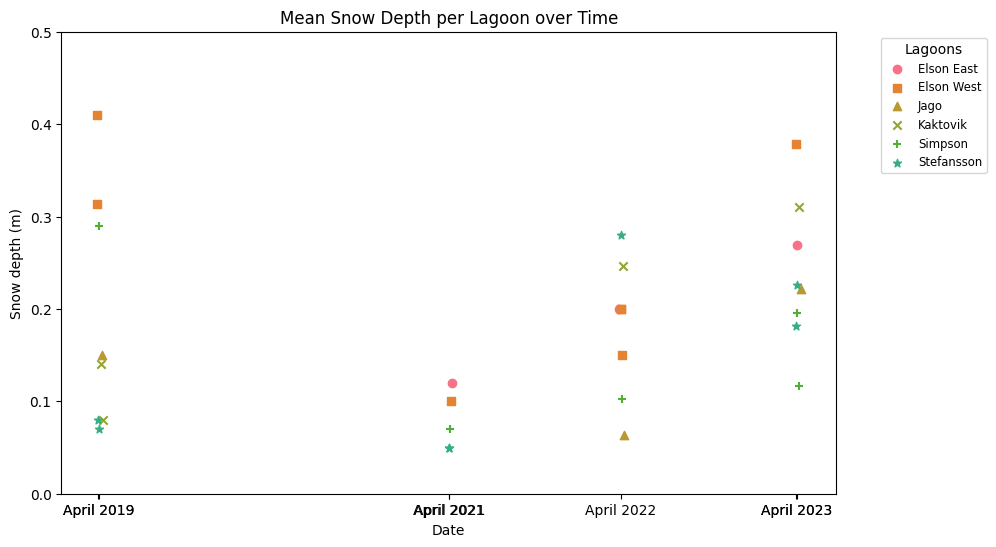

In [16]:
plt.figure(figsize=(10,6))

# Assigning 5 different marker shapes
markers = ['o', 's', '^', 'x', '+', '*']

# Plot data with different markers in a single line
for i, lagoon in enumerate(snow_df_reset['lagoon'].unique()):
    lagoon_df = snow_df_reset[snow_df_reset['lagoon'] == lagoon]
    plt.scatter(lagoon_df['date_time'], lagoon_df['mean'], marker=markers[i], label=lagoon)


plt.xlabel('Date')

plt.ylabel('Snow depth (m)')

plt.ylim(0, 0.5)

plt.xticks(lagoon_df['date_time'],['April 2019','April 2021', 'April 2022', 'April 2023', 'April 2019', 'April 2021', 'April 2023'])

plt.title('Mean Snow Depth per Lagoon over Time')

plt.legend(title="Lagoons", loc="upper left", fontsize="small", bbox_to_anchor=(1.05, 1))

plt.savefig('Mean Snow Depth Lagoon.jpg', bbox_inches='tight')


plt.show()

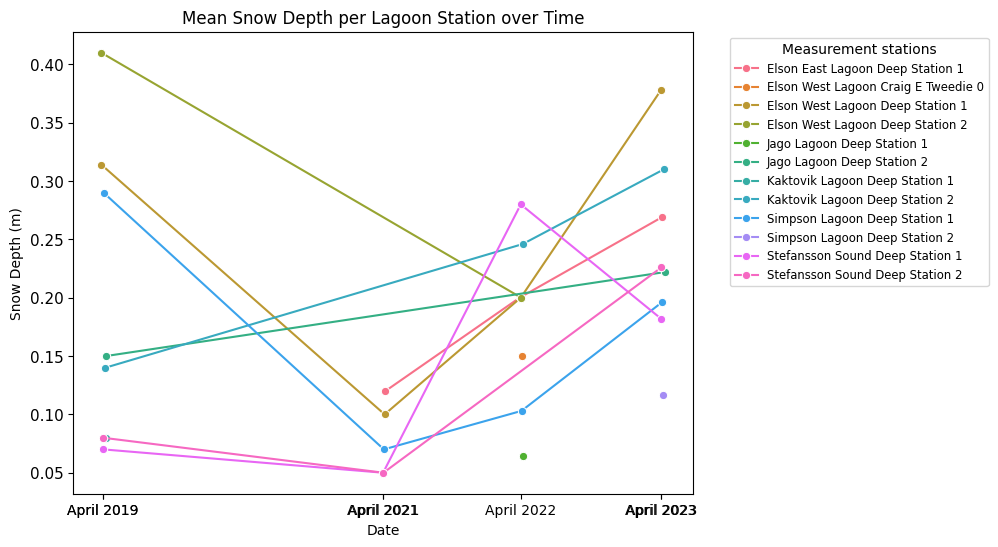

In [17]:
plt.figure(figsize=(8, 6))  # Width, height in inches

for station in snow_df_reset['station_name'].unique():  
    station_df = snow_df_reset[snow_df_reset['station_name'] == station]  
    sns.lineplot(x=station_df['date_time'], y=station_df['mean'], data=station_df, marker='o',label=station) # Style used to mark the join between 2 points

plt.xlabel('Date')

plt.ylabel('Snow Depth (m)')

plt.yticks(fontsize=11)

plt.xticks(lagoon_df['date_time'],['April 2019','April 2021', 'April 2022', 'April 2023', 'April 2019', 'April 2021', 'April 2023'])

plt.title('Mean Snow Depth per Lagoon Station over Time')

plt.legend(title="Measurement stations", loc="upper left", fontsize="small", bbox_to_anchor=(1.05, 1))

plt.savefig('Mean Snow Depth Station.jpg', bbox_inches='tight')

plt.show()

In [72]:
from scipy.stats import spearmanr

snow = snow_df['mean']
ice = ice_df['mean']

#concatenate the two dataframes across the first axis, or horizontally. Because they have different sizes, we pass ignore_index as true
new_df= pd.concat([ice, snow], axis=1, ignore_index = True) 

#check to see if there are any NaN values
new_df.isna().any()

#drop Nan values, to make the columns the same size
new_df_clean= new_df.dropna()

#get the correlation coeficient and the p value
spearman = spearmanr(new_df_clean[0], new_df_clean[1])

Using the Spearman correlation, the correlation coefficient between ice thickness and snow depth is of -0.56 suggesting that there is moderate negative linear relationship between the two variables. 

The p value is of 0.001, meaning that the results are statistically significant and suggesting that the observed correlation between ice thickness and snow is unlikely to have occurred by random chance alone, providing evidence in support of a genuine relationship between the variables.

Given that the data involves measurements taken at different locations throughout time, and considering the variability that may exist in these measurements, Spearman correlation should be a prudent choice. It can provide insights into the overall association between ice thickness and snow depth without making strong assumptions about the distribution or linearity of the data.